In [22]:
# 칼럼설명
# pclass : 객실 등급
# survived : 생존 유무
# sex : 성별
# age : 나이
# sibsp : 형제 혹은 부부의 수
# parch : 부모, 혹은 자녀의 수
# fare : 지불한 운임
# boat : 탈출한 보트가 있다면 boat 번호

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
rawdata = pd.read_excel("data/titanic.xls")
#dataframe의 row,column,dtype등 정보를 살펴보자
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
#앞부분 2건만 살펴보자
rawdata.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
#모든 칼럼의 통계정보 살펴보기 count, mean, std, min, max, 25%, .......
rawdata.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [43]:
#그래프에 한글이 깨지지 않도록 설정한다. 
import matplotlib as mpl
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts/malgun.TTF").get_name()
rc('font', family=font_name, size=12)  #rc는 리소스관리 
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [37]:
import seaborn as sns
sns.set(style="darkgrid")

In [38]:
import matplotlib.pyplot as plt

#dataframe의 survived칼럼은 생존(1), 사망(0)의 값을 가진다.
#생존수와 사망자수를 알아본다....값의 갯수 
rawdata.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

In [39]:
s = rawdata.survived.value_counts()
type(s)

pandas.core.series.Series

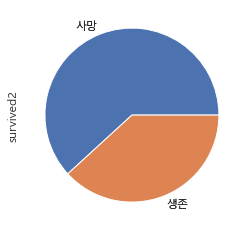

In [44]:
#위의 series를 이용해서 pie()를 그려본다.  pie 의 labels를 변경해본다. 
s.plot.pie()
s.plot.pie(labels=["사망","생존"])

In [20]:
def f(x):
    if x==0:
        return "사망"
    else:
        return "생존"

In [45]:
#dataframe에 survived2칼럼을 추가한다.
#survived가 0이면 사망, 1이면 생존 (apply함수를 사용해보자)
rawdata['survived2'] = rawdata.survived.apply(f)
rawdata['survived3'] = rawdata.survived.apply(lambda x: "사망" if x==0 else "생존")
rawdata[["survived", "survived2", "survived3"]]

,survived,survived2,survived3
0,1,생존,생존
1,1,생존,생존
2,0,사망,사망
3,0,사망,사망
4,0,사망,사망
...,...,...,...
1304,0,사망,사망
1305,0,사망,사망
1306,0,사망,사망
1307,0,사망,사망


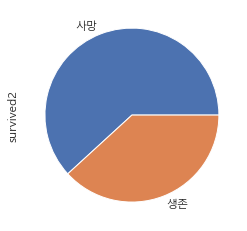

In [46]:
s = rawdata["survived2"].value_counts()
s.plot.pie()
plt.show()

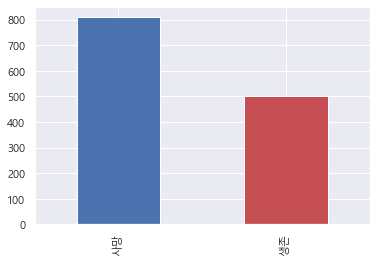

In [47]:
#series에 plot()... 그래프 종류kind  색깔 color
s.plot(kind="bar", color=["b", "r"])
plt.show()

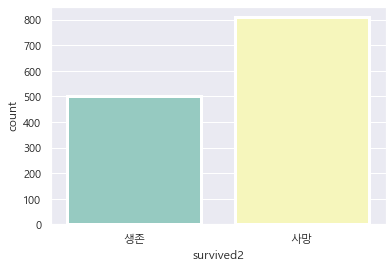

In [60]:
#생존여부를 countplot로 그려보자  palette="Set3" linewidth=2
sns.countplot("survived2", data=rawdata, palette="Set3", linewidth=3)

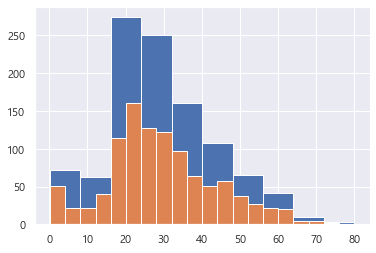

In [51]:
#age칼럼으로 히스토그램을 그려보자~ 어느 나이대의 인원이 많은가?
#hist(bins=20)
rawdata["age"].hist()
rawdata["age"].hist(bins=20)

In [71]:
#나이가 들어오면 10으로 나눈 몫을 return하는 함수를 만들어보자 
def age(x):
    return x//10

In [73]:
#어느 나이대가 생존율이 높은가...
#10대인지 20대인지......
rawdata["age2"] = rawdata.age.apply(age)
rawdata["age2"] = rawdata.age.apply(lambda x: x//10)

#나이그룹별 인원수 : 10대 143명 , 20대 344명 ...count(), size()
rawdata["age2"].value_counts()
rawdata.groupby("age2").size()

#나이별 생존(1), 사망(0) ..10대는 56명 생존 
rawdata.groupby("age2")["survived"].sum()

age2
0.0     50
1.0     56
2.0    127
3.0     98
4.0     52
5.0     32
6.0     10
7.0      1
8.0      1
Name: survived, dtype: int64

In [77]:
sum(rawdata[(rawdata.age>=10) & (rawdata.age<20)]["survived"])

56

In [65]:
rawdata[["age","age2"]]

,age,age2
0,29.0000,1.0
1,0.9167,0.0
2,2.0000,0.0
3,30.0000,1.0
4,25.0000,1.0
...,...,...
1304,14.5000,0.0
1305,NaN,NaN
1306,26.5000,1.0
1307,27.0000,1.0


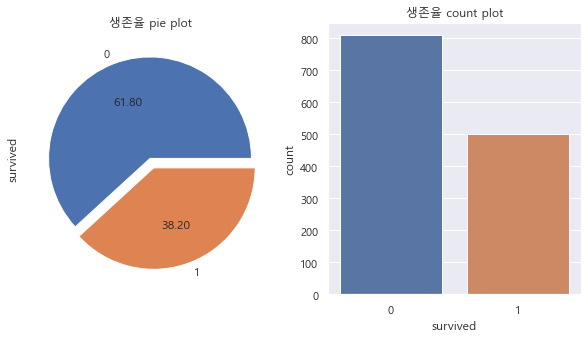

In [78]:
#시각화해보기
#f : Figure(모양)
#ax :  subplot ....1,2 이므로 2개의 축  ax[0] ax[1]   .......... ax=ax[0]왼쪽에 pie그리기 
f, ax=plt.subplots(1,2, figsize=(10,5))

#explode : 분할 ....살짝 떨어지도록 설정하고자 하는 경우 사용 
#Series에 있는 plot()메서드로 그리기 
rawdata["survived"].value_counts().plot.pie(
                explode=[0, 0.1], 
                autopct="%.2f", ax=ax[0])  

sns.countplot("survived", data=rawdata, ax=ax[1])

ax[0].set_title("생존율 pie plot")
ax[1].set_title("생존율 count plot")
plt.show()

In [79]:
#칼럼들간의 상관계수 알아보기 
rawdata.corr()

,pclass,survived,age,sibsp,parch,fare,body,age2
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642,-0.392612
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN,-0.054425
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809,0.980059
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961,-0.237624
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099,-0.149212
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110,0.166712
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000,0.024945
age2,-0.392612,-0.054425,0.980059,-0.237624,-0.149212,0.166712,0.024945,1.000000


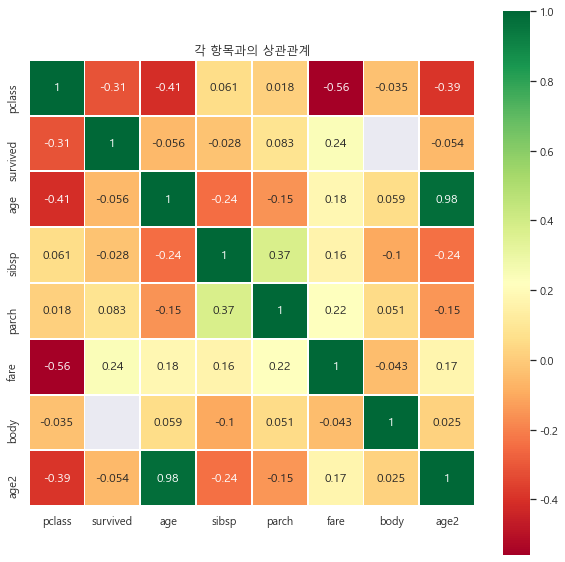

In [80]:
#상관계수를 heatmap으로 그려보기 
#linewidths은 각 square간의 간격선 두께 
#cmap=plt.cm.rainbow   plt.cm.Blues  plt.cm.autumn   plt.cm.RdYlGn  plt.cm.viridis 
plt.figure(figsize=(10,10))
sns.heatmap(rawdata.corr(), linewidths=1, square=True,
           annot=True, cmap=plt.cm.RdYlGn, linecolor="white")
plt.title("각 항목과의 상관관계")
plt.show()
# r = X와 Y가 함께 변하는 정도 / X와 Y가 각각 변하는 정도
# 결과의 해석
# r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 
#결정계수 (coefficient of determination) 는 r^2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

# 일반적으로

# r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
# r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
# r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
# r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
# r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
# r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
# r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

#survived는 fare와 pclss와 음적 상관관계가 있다......

In [86]:
#include_lowest=True : 낮은쪽에 포함시킨다. 
#0<=baby<=10  
#10<teenage<=20 
#20<adult<=60 
#50<old<=100
#cut() : 지정된 항목에  구간값을 찾는다. 
rawdata["age_category"] = \
   pd.cut(rawdata["age"], bins=[0,10,20,50,100], 
          include_lowest=False,   
          labels=["baby","teenage","adult","old"]) #구간이4개 
rawdata[["age_category","age"]].head()

,age_category,age
0,adult,29.0000
1,baby,0.9167
2,baby,2.0000
3,adult,30.0000
4,adult,25.0000


In [89]:
def ageCat2(x):
    if x< 10:
        return "baby"
    elif x< 20:
        return "teenager"
    elif x< 60:
        return "adult"
    else:
        return "old"
rawdata["age_category"] = rawdata.age.apply(ageCat2)

In [90]:
#나이가 10세이면 age_category가 baby로 들어갔는지 확인해본다. 
rawdata[rawdata.age == 10][["age","age_category"]]
# rawdata[rawdata.age == 20][["age","age_category"]]
# rawdata[rawdata.age == 30][["age","age_category"]]

,age,age_category
828,10.0,baby
1141,10.0,baby
1207,10.0,baby
1265,10.0,baby


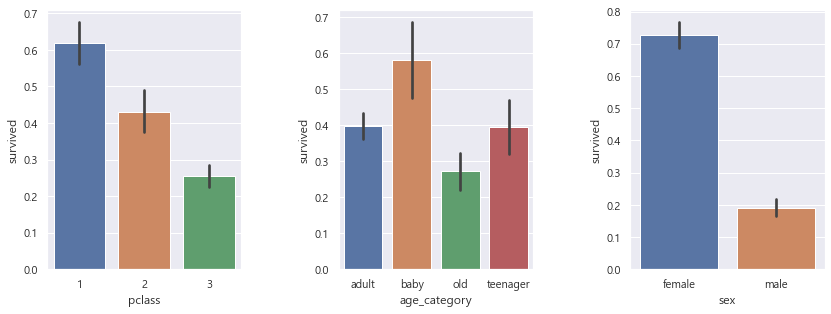

In [91]:
import warnings
warnings.filterwarnings("ignore")

#subplot : 131 => 1줄 3개중에 1번째 
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot("pclass","survived", data=rawdata)

plt.subplot(132)
sns.barplot("age_category","survived", data=rawdata)

plt.subplot(133)
sns.barplot("sex","survived", data=rawdata)

plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, 
                    hspace=0.5, wspace=0.5)

#1등석  baby  여자가 생존율이 더 높음을 볼 수 있다...........
#그런데 진짜로 baby가 생존율이 높다는것이 확실할까? 

In [98]:
#사망자중에 나이를 알수 있는 데이터중에 나이만 추출해본다.  
aa = rawdata[rawdata.survived==0 & rawdata.age.notnull()]["age"]

#생존자중에 나이를 알수 있는 데이터중에 나이만 추출해본다.  
bb = rawdata[rawdata.survived==1 & rawdata.age.notnull()]["age"]

In [100]:
sum(rawdata.age.notnull())

1046

In [103]:
len(aa) + len(bb)

1426

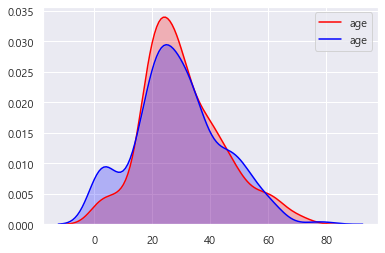

In [97]:
sns.kdeplot(aa, color="Red", shade=True)
sns.kdeplot(bb, color="Blue", shade=True)
plt.show()

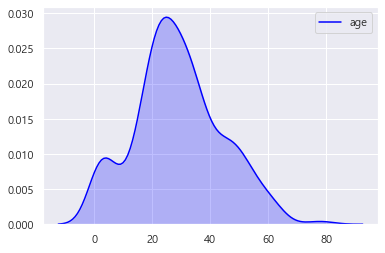

In [95]:
#생존만 그려본다.
sns.kdeplot(bb, color="Blue", shade=True)
plt.show()

Text(0.5, 1.0, '성별에 대한  생존')

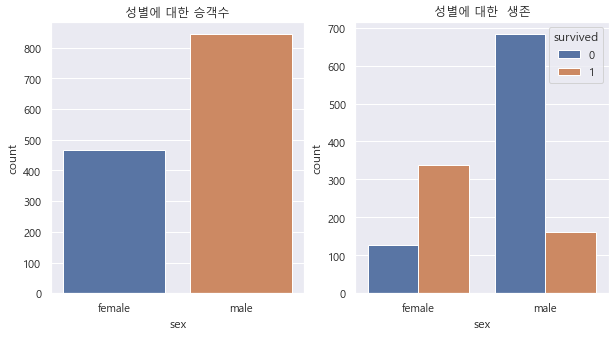

In [106]:
#남녀의 비율을 보자
f,ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot("sex", data=rawdata, ax=ax[0])   
ax[0].set_title("성별에 대한 승객수")

#오른쪽은 성별에 대한 승객수를 survived값으로 구분하여별로 보여줌 (hue)
sns.countplot("sex", data=rawdata, ax=ax[1], hue="survived") 
ax[1].set_title("성별에 대한  생존")

#승객수는 남자가 많았지만 살아남은 것은 여자가 더 많음을 볼 수 있다. 

In [107]:
rawdata[rawdata["boat"].notnull()]["boat"]

0           2
1          11
5           3
6          10
8           D
        ...  
1260       15
1261       15
1277    13 15
1286        C
1299        C
Name: boat, Length: 486, dtype: object

In [111]:
#보트에 탄 사람중에 생존율 살표보기 rawdata["boat"]에는 보트번호가 있음 
#보트번호가 결측이 아닌 데이터는 몇건일까?
#보트에 탄 사람중에 사망자와 생존자의 수는 어떻게될까?
rawdata[rawdata["boat"].notnull()]["boat"].size

486

In [113]:
boat_survivors = rawdata[rawdata["boat"].notnull()]

Text(0.5, 1.0, '보트 탑승자중에 생존자')

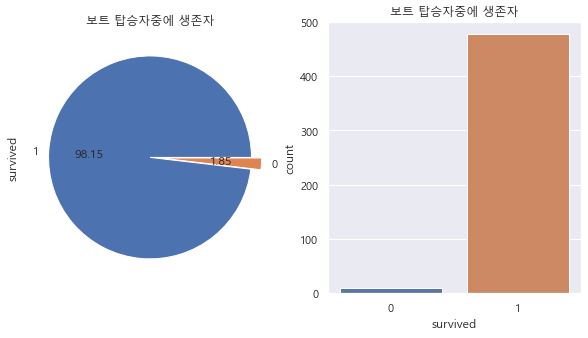

In [114]:
f, ax = plt.subplots(1,2, figsize=(10,5))
#보트에 탄 사람의 생존여부를 pie 그래프로 그려보자  
boat_survivors["survived"].value_counts().plot.pie(
            explode=[0,0.1], autopct="%1.2f", ax=ax[0])

#보트에 탄 사람의 생존여부를 countplot 그래프로 그려보자  
sns.countplot("survived", data=boat_survivors, ax=ax[1])


ax[0].set_title("보트 탑승자중에 생존자")
ax[1].set_title("보트 탑승자중에 생존자")
#보트에 탄 사람들은 거의 살았다..

In [115]:
def bar_char(feature):
    survived = rawdata[rawdata["survived"]==1][feature].value_counts()
    dead = rawdata[rawdata["survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["survived", "dead"]    

    df.plot(kind="bar", stacked=False,  figsize=(10,5))

In [116]:
def pie_char(feature):
    survived = rawdata[rawdata["survived"]==1][feature].value_counts()
    dead = rawdata[rawdata["survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["survived", "dead"]
    df.plot.pie(subplots=True,  figsize=(15,5))

In [125]:
rawdata.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived2',
       'survived3', 'age2', 'age_category'],
      dtype='object')

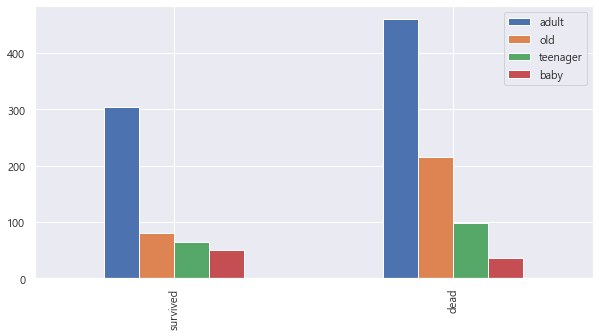

In [126]:
bar_char("age_category")

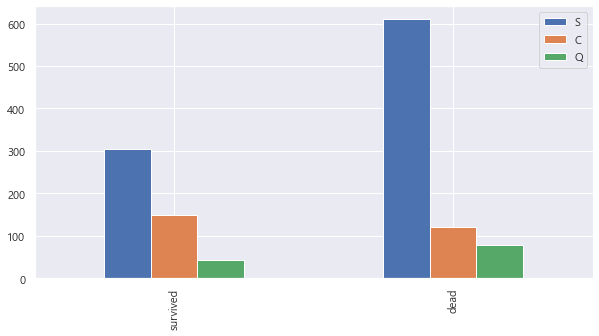

In [121]:
#bar_char("sex")
bar_char("embarked")

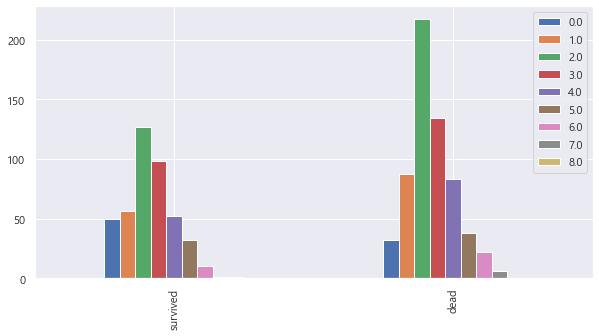

In [122]:
bar_char("age2")

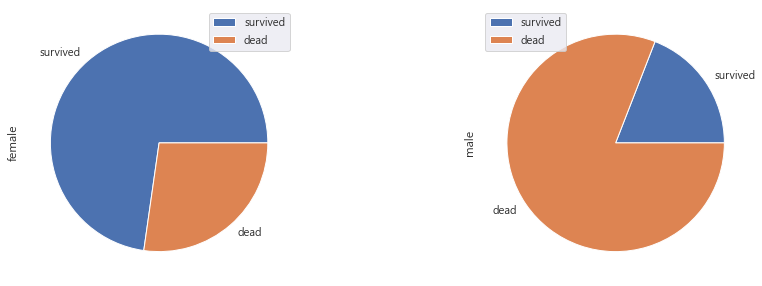

In [123]:
pie_char("sex")

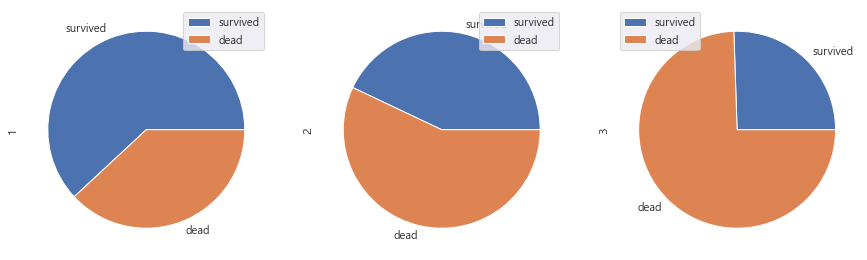

In [124]:
pie_char("pclass")

In [66]:
#여성일수록 
#pclass가 높을수록
#cherbourg선착장에서 배를 탔다면 
#형제,자매,배우자, 부모,자녀와 함께 배에 탔다면 생존 확률이 더 높았다.